<h1>Advertising Logistic Regression Model</h1>

<p>In this project we will work with fake data on advertising, which shows whether a user has clicked on an advertisement on a company website or not. <br>
I will try to create a model that uses user characteristics to predict whether or not they will click on the advertisement.

This project is based on the data science course by Dr. Rene Brunner.</p>

<h3>The data set contains the following properties:</h3>

<ul>
    <li>'Daily Time Spent on Site': Time on the website in minutes</li> 
    <li>'Age': Age in years</li>
    <li>'Area Income': Average income in the user's region</li>
    <li>'Daily Internet Usage': Average number of minutes that the user is on the Internet every day</li>
    <li>'Ad Topic Line': Headline of the advertisement</li>
    <li>'City': City of the user</li>
    <li>'Male': Whether the user is male (1) or not (0)</li>
    <li>'Country': country of the user</li>
    <li>'Timestamp': Time at which the user clicked on the advertisement or closed the window</li>
    <li>'Clicked on Ad': Whether the user clicked (1) or not (0)</li>
</ul>


<h2>1. Initialising, importing and loading the data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

# for logistic regression:
from sklearn.model_selection import train_test_split # split data into test and train
from sklearn.linear_model import LogisticRegression  # linear regression
from sklearn.metrics import classification_report  # classification report

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<h2>2. Exploratory data analysis</h2>

Text(0.5, 0, 'Age')

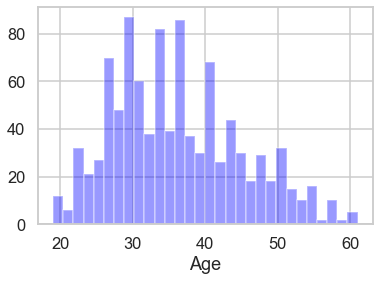

In [6]:
sns.set_style("whitegrid")
sns.distplot(data['Age'],kde=False,color='blue',bins=30)
plt.xlabel("Age")

<p style="font-size:18px">Most users are between the ages of 30 and 40</p>

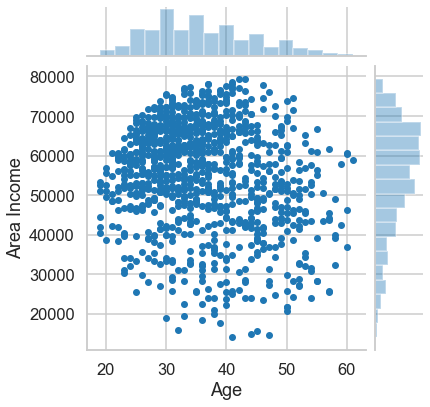

In [7]:
sns.jointplot(x="Age", y = "Area Income", data=data, kind="scatter", s=30)

<p style="font-size:18px">We can see that most incomes are between 70.000 and 50.000. The age at which one earns the most is between 25 and around 43.</p>

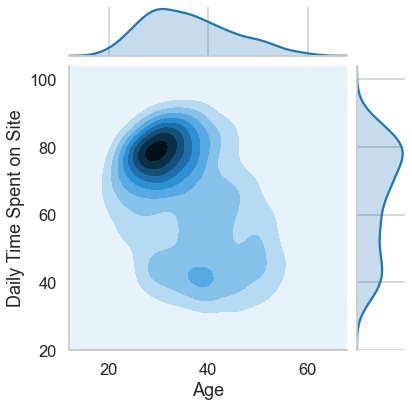

In [8]:
sns.jointplot(x="Age", y = "Daily Time Spent on Site", data=data, kind="kde")

<p style="font-size:18px">At around 30 years of age, the user spends most of his time on the website</p>

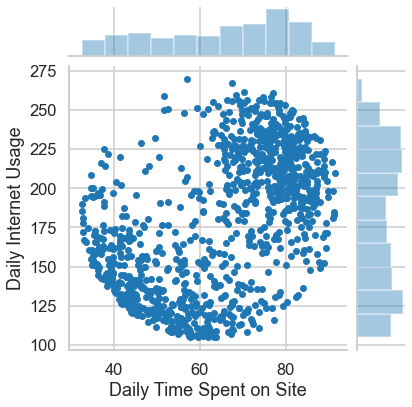

In [9]:
sns.jointplot(x="Daily Time Spent on Site", y = "Daily Internet Usage", data=data, kind="scatter", s=30)

<p style="font-size:18px">We have two hot spots cause Daily Time Spent on Site: once in the lower range between 35 and 60, and the upper range 70-90.<br>
Internet usage is fairly evenly distributed.</p>

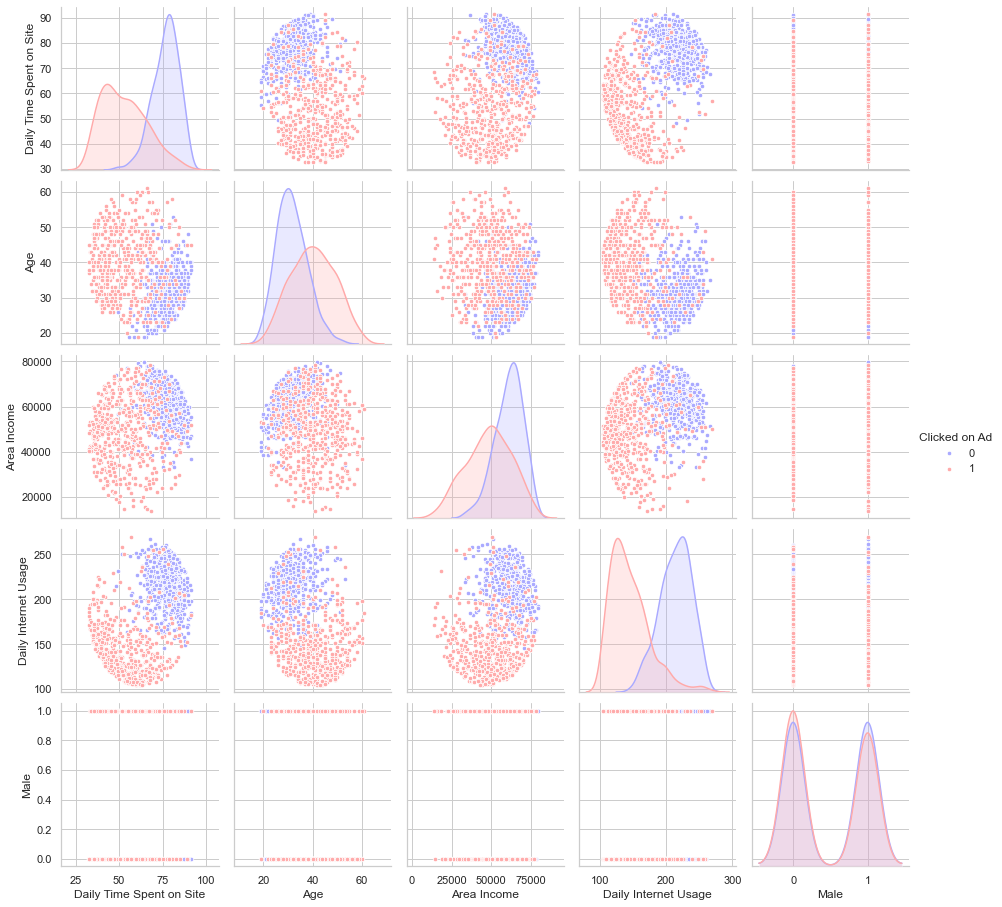

In [10]:
sns.set_context('notebook')
sns.pairplot(data, hue="Clicked on Ad", palette = "bwr", plot_kws={"s": 20})

<p style="font-size:18px">Here we can see that those users who spend little time on the website are more likely to click on the ad, regardless of age or income.<br>
Power users, i.e. users who spend a lot of time on the Internet and who statistically also have a higher income, tend not to click on the ad.</p>

<h2>3. Start with logistic regression</h2>

<p style="font-size:18px">Lets split data into train and test data</p>

In [11]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h3>3.1 Train Data</h3>

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

<h3>3.2 Prediction</h3>

In [14]:
predictions = logmodel.predict(X_test)

<h3>3.3 Create a classification report for the model</h3>

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



<p style="font-size:18px">precision: 96% of the users predicted by the Logistic Regression Model actually clicked on the ad.<br>
recall: At the same time, the model identified 85% of all users who clicked on the ad.</p>